In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mofax as mfx
#import os 
#os.chdir("../")

In [34]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 200

In [35]:
scenario_files = {
    'scenario_factor_5': mfx.mofa_model("s_factor_5_wt_mofa_model.hdf5"),
    'scenario_factor_10': mfx.mofa_model("s_factor_10_wt_mofa_model.hdf5"),
    'scenario_factor_15': mfx.mofa_model("s_factor_15_wt_mofa_model.hdf5"),
    'scenario_factor_20': mfx.mofa_model("s_factor_20_wt_mofa_model.hdf5"),
    #'scenario_factor_2': mfx.mofa_model("s_factor_2_wt_mofa_model.hdf5"),
}

In [36]:
m = mfx.mofa_model("s_factor_5_wt_mofa_model.hdf5")

In [37]:
m

MOFA+ model: s factor 5 wt mofa model
Samples (cells): 88
Features: 14994
Groups: group_KC_wt (23), group_lipidomics_wt (23), group_metabolomics_wt (42)
Views: Lipidomics (342), metabolomics (909), transcriptomics_KC (13743)

In [38]:
print("\npd.dataframe:\n", m.get_weights(df=True).iloc[:])


pd.dataframe:
                 Factor1   Factor2   Factor3   Factor4
DAG(36:1)      0.764634 -0.008346  0.086117  0.045630
PS(40:4)      -0.003016  0.018880 -0.042269  0.007464
PS(40:7)      -0.082276 -0.013903  0.017706 -0.062065
TAG(58:8)_TAG  0.000000  0.000000  0.000000  0.000000
TAG(58:9)_TAG  0.005535  0.071149  0.012546  0.019218
...                 ...       ...       ...       ...
Vmn1r16        0.000603 -0.006212  0.786473 -0.177791
AC166369.3    -1.064335 -0.038380  0.017625  0.001479
CT009530.1    -0.000496 -0.380064  0.820809  0.013984
AC137871.4    -0.001983 -0.013146  0.000386 -0.003819
AC144772.3    -0.225229 -0.437533  0.095761 -0.011407

[14994 rows x 4 columns]


In [39]:
m.get_weights(df=True).iloc[:]

,Factor1,Factor2,Factor3,Factor4
DAG(36:1),0.764634,-0.008346,0.086117,0.045630
PS(40:4),-0.003016,0.018880,-0.042269,0.007464
PS(40:7),-0.082276,-0.013903,0.017706,-0.062065
TAG(58:8)_TAG,0.000000,0.000000,0.000000,0.000000
TAG(58:9)_TAG,0.005535,0.071149,0.012546,0.019218
...,...,...,...,...
Vmn1r16,0.000603,-0.006212,0.786473,-0.177791
AC166369.3,-1.064335,-0.038380,0.017625,0.001479
CT009530.1,-0.000496,-0.380064,0.820809,0.013984
AC137871.4,-0.001983,-0.013146,0.000386,-0.003819


In [40]:
df_scenario_factor_5= pd.DataFrame(m.get_weights(df=True).iloc[:])
df_scenario_factor_5['sum_abs'] = df_scenario_factor_5.abs().sum(axis=1)
df_scenario_factor_5

#sort descending
df_scenario_factor_5 = df_scenario_factor_5.sort_values(by='sum_abs', ascending=False)
df_scenario_factor_5

,Factor1,Factor2,Factor3,Factor4,sum_abs
Smc4,0.752762,-3.499607,0.571461,-0.117801,4.941631
Rock2,0.711537,-3.254628,0.027304,-0.857418,4.850887
Gm16754,0.790740,-2.343491,0.605341,-0.796812,4.536384
TAG(58:11)_TAG,3.051291,1.013773,-0.131288,-0.058553,4.254905
AC162938.1,1.119660,-1.602032,0.832697,-0.662179,4.216568
...,...,...,...,...,...
Cyc1,0.000000,0.000000,0.000000,0.000000,0.000000
Sharpin,0.000000,0.000000,0.000000,0.000000,0.000000
Tsta3,0.000000,0.000000,0.000000,0.000000,0.000000
Gsdmd,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
#absolute sum for scenario_factor_10
df_scenario_factor_10= pd.DataFrame(scenario_files['scenario_factor_10'].get_weights(df=True).iloc[:])
df_scenario_factor_10['sum_abs'] = df_scenario_factor_10.abs().sum(axis=1)
df_scenario_factor_10

#sort descending
df_scenario_factor_10 = df_scenario_factor_10.sort_values(by='sum_abs', ascending=False)
df_scenario_factor_10



,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,sum_abs
Gm43769,0.060246,0.005733,-0.222733,-0.020531,2.714082,0.003611,-1.902311,-0.601215,0.707984,6.238446
PG(32:1),2.535712,-0.022703,-2.660435,0.019500,0.001515,0.009403,0.374439,0.001791,0.013948,5.639445
Gm10521,0.003257,-0.193207,-0.093338,2.232589,1.845669,-0.000390,0.010498,1.117204,-0.000906,5.497057
AC158598.1,-0.097077,0.012075,0.003951,-0.042686,1.794263,-0.005705,-3.456010,0.048954,0.034255,5.494977
Kcnq1ot1,0.000885,-0.048006,1.845123,1.452022,0.000611,0.001117,-0.018046,1.229487,0.802901,5.398198
...,...,...,...,...,...,...,...,...,...,...
Gsdmd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acaa1a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rpp25l,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mettl26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
#absolute sum for scenario_factor_15
df_scenario_factor_15= pd.DataFrame(scenario_files['scenario_factor_15'].get_weights(df=True).iloc[:])
df_scenario_factor_15['sum_abs'] = df_scenario_factor_15.abs().sum(axis=1)
df_scenario_factor_15

#sort descending
df_scenario_factor_15 = df_scenario_factor_15.sort_values(by='sum_abs', ascending=False)
df_scenario_factor_15

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,sum_abs
Gm10521,-0.037707,-0.168407,-0.039867,0.002775,-0.005392,-0.007381,-0.002753,2.000085,2.257650,2.474157,0.003967,7.000142
Dhx9,-0.001410,-0.398280,1.543391,0.018438,-0.025201,0.016058,0.003410,2.432992,0.091670,1.701835,0.007839,6.240523
CT030182.2,0.944659,-0.000809,0.117383,-0.166745,0.008255,0.005461,0.007131,1.630376,-0.030051,2.617484,0.474419,6.002773
Lima1,1.782515,-0.432649,-0.063240,0.010410,-0.002132,1.062344,-0.000584,0.650142,1.595934,0.001823,-0.000183,5.601956
Zbtb1,-1.731234,-0.680006,1.878979,0.003191,-0.016778,-0.025285,0.024987,-0.012326,1.144641,0.053658,0.003012,5.574095
...,...,...,...,...,...,...,...,...,...,...,...,...
Hk3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hspd1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rpl7l1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ptp4a1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
#absolute sum for scenario_factor_20
df_scenario_factor_20= pd.DataFrame(scenario_files['scenario_factor_20'].get_weights(df=True).iloc[:])
df_scenario_factor_20['sum_abs'] = df_scenario_factor_20.abs().sum(axis=1)
df_scenario_factor_20

#sort descending
df_scenario_factor_20 = df_scenario_factor_20.sort_values(by='sum_abs', ascending=False)
df_scenario_factor_20


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,sum_abs
Kcnq1ot1,-0.010495,-0.001533,-0.001775,1.798900,-1.212238,0.039357,0.007991,1.255876,-0.697398,1.984514,-0.000555,7.010631
Gm43769,-0.072315,0.001398,0.152877,-0.033301,0.004637,0.001124,2.632418,-0.616705,-2.318435,-0.506828,-0.018266,6.358303
Gm10521,-0.009764,-0.159416,-0.038386,2.673129,0.009727,0.001320,1.997063,1.098619,0.006578,-0.022050,0.005262,6.021314
Gm39312,0.031347,0.009678,-0.072664,-0.070466,-0.011938,0.035676,2.591441,0.012788,-2.436918,0.663305,-0.019978,5.956198
Gm38198,-0.004155,0.034703,-0.115078,-0.048158,-0.195671,0.003958,2.008647,0.041743,-3.325118,-0.013991,-0.035205,5.826427
...,...,...,...,...,...,...,...,...,...,...,...,...
Cisd3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Evi2a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ddx41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hist3h2a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
# Calculate sum_abs and sort by sum_abs values for each scenario
for scenario, model in scenario_files.items():
    df = model.get_weights(df=True).iloc[:]
    df['sum_abs'] = df.abs().sum(axis=1)
    df = df.sort_values(by='sum_abs', ascending=False)
    scenario_files[scenario] = df

# Select top 100 features for each scenario
for scenario, df in scenario_files.items():
    scenario_files[scenario] = df.iloc[:100]
print(scenario_files)

{'scenario_factor_5':                  Factor1   Factor2   Factor3   Factor4   sum_abs
Smc4            0.752762 -3.499607  0.571461 -0.117801  4.941631
Rock2           0.711537 -3.254628  0.027304 -0.857418  4.850887
Gm16754         0.790740 -2.343491  0.605341 -0.796812  4.536384
TAG(58:11)_TAG  3.051291  1.013773 -0.131288 -0.058553  4.254905
AC162938.1      1.119660 -1.602032  0.832697 -0.662179  4.216568
...                  ...       ...       ...       ...       ...
Nol11          -1.244112 -1.119312 -0.556035  0.141321  3.060780
Tmx3           -0.061509 -2.937881 -0.025197  0.034107  3.058695
Oxct1          -0.778458 -2.198824  0.053159 -0.024486  3.054927
Ddx42          -0.818319 -2.111848 -0.035682 -0.082186  3.048035
Slmapos2       -0.010420 -2.954439  0.021210  0.061905  3.047974

[100 rows x 5 columns], 'scenario_factor_10':              Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
Gm43769     0.060246  0.005733 -0.222733 -0.020531  2.714082  0.003611   
PG(

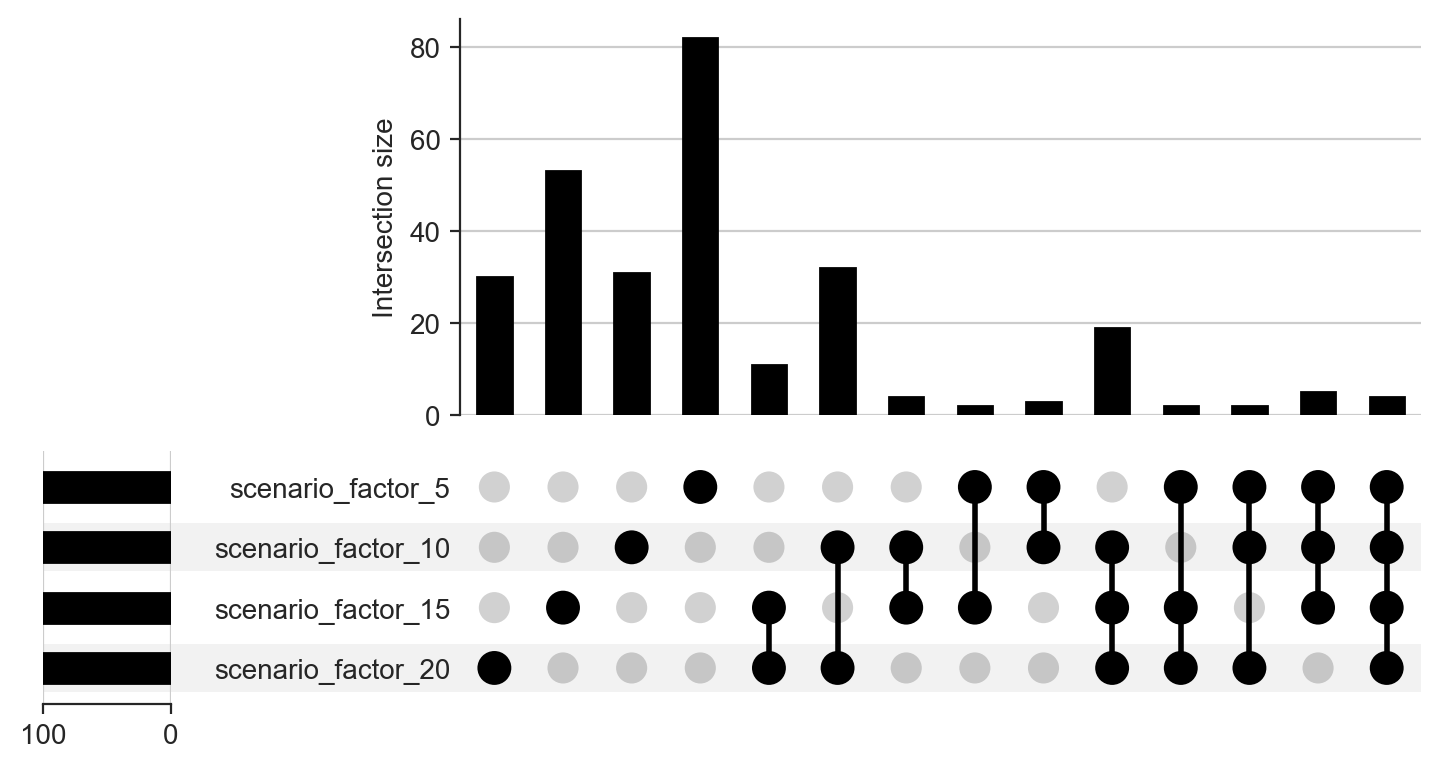

In [45]:
#upset plot for top 100 features for each scenario based on sum_abs values
from upsetplot import generate_counts
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

data = from_contents({
    'scenario_factor_5': scenario_files['scenario_factor_5'].index,
    'scenario_factor_10': scenario_files['scenario_factor_10'].index,
    'scenario_factor_15': scenario_files['scenario_factor_15'].index,
    'scenario_factor_20': scenario_files['scenario_factor_20'].index,
    #'scenario_factor_2': scenario_files['scenario_factor_2'].index,
})

upset = UpSet(data)
upset.plot()
plt.show()


In [46]:
#commen features represented in all scenarios
common_features = set(scenario_files['scenario_factor_10'].index)
for scenario, df in scenario_files.items():
    common_features = common_features.intersection(df.index)
print(common_features)


{'Dhx9', 'Smc4', 'Gm42648', 'Prpf39'}


In [47]:
#commen features in top 200 features for each scenario
common_featuresA = scenario_files['scenario_factor_5'].index.intersection(scenario_files['scenario_factor_10'].index).intersection(scenario_files['scenario_factor_15'].index).intersection(scenario_files['scenario_factor_20'].index)
common_featuresA

Index(['Smc4', 'Gm42648', 'Dhx9', 'Prpf39'], dtype='object')

In [48]:
#represent in dataframe
df_common_features = pd.DataFrame(common_featuresA)
df_common_features

,0
0,Smc4
1,Gm42648
2,Dhx9
3,Prpf39
